**PEMBELAJARAN MESIN**

Razita Amalina - 1301200283 - IF4409

# I. Library

In [ ]:
# import library untuk pra-pemrosesan data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Import library untuk Clustering
from numpy.linalg import norm

import warnings
warnings.filterwarnings('ignore')

# II.	Kumpulan Data yang Dipilih

In [ ]:
# import data water-treatment.data

missing_values = ["n/a", "na", "--","?"]
water_treatment = pd.read_csv("https://raw.githubusercontent.com/razitaamln/CASE-BASED-2_1301200283/main/water-treatment.data", header = None, na_values = missing_values)
water_treatment

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,D-29/8/91,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
# Mengetahui info dari dataset

water_treatment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       527 non-null    object 
 1   1       509 non-null    float64
 2   2       524 non-null    float64
 3   3       527 non-null    float64
 4   4       504 non-null    float64
 5   5       521 non-null    float64
 6   6       526 non-null    float64
 7   7       516 non-null    float64
 8   8       502 non-null    float64
 9   9       527 non-null    int64  
 10  10      527 non-null    float64
 11  11      487 non-null    float64
 12  12      527 non-null    int64  
 13  13      516 non-null    float64
 14  14      503 non-null    float64
 15  15      527 non-null    int64  
 16  16      527 non-null    float64
 17  17      499 non-null    float64
 18  18      518 non-null    float64
 19  19      525 non-null    float64
 20  20      514 non-null    float64
 21  21      502 non-null    float64
 22  22

# III. Pra-pemrosesan Data

In [ ]:
# Menghapus kolom tanggal

water_treatment.drop(water_treatment.columns[0], inplace = True, axis = 1)  

In [ ]:
# Menambahkan nama kolom

dataframe = pd.DataFrame(water_treatment.to_numpy(), columns = ["Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", 
    "SSV-E", "SED-E", "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P",
    "PH-D", "DBO-D", "DQO-D", "SS-D", "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S",
    "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P", "RD-SS-P", "RD-SED-P",
    "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"])

dataframe

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894.0,7.7,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988.0,7.8,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
524,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060.0,7.5,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0
525,32190.0,0.30,7.3,200.0,545.0,258.0,65.1,4.0,1260.0,7.4,...,1326.0,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [ ]:
# Mengeccek apakah ada missing value
print(dataframe.isnull().values.any())

True


In [ ]:
# Mengecek berapa banyak missing values
dataframe.isnull().sum().sum()

591

In [ ]:
# Mengisi missing value (imputasi) dengan nilai mean

dataframe.fillna(dataframe.mean(), inplace=True)

In [ ]:
# Mengecek kembali apakah masih ada missing values

dataframe.isnull().sum().sum()

0

In [ ]:
sorted(dataframe)

['COND-D',
 'COND-E',
 'COND-P',
 'COND-S',
 'DBO-D',
 'DBO-E',
 'DBO-P',
 'DBO-S',
 'DQO-D',
 'DQO-E',
 'DQO-S',
 'PH-D',
 'PH-E',
 'PH-P',
 'PH-S',
 'Q-E',
 'RD-DBO-G',
 'RD-DBO-P',
 'RD-DBO-S',
 'RD-DQO-G',
 'RD-DQO-S',
 'RD-SED-G',
 'RD-SED-P',
 'RD-SS-G',
 'RD-SS-P',
 'SED-D',
 'SED-E',
 'SED-P',
 'SED-S',
 'SS-D',
 'SS-E',
 'SS-P',
 'SS-S',
 'SSV-D',
 'SSV-E',
 'SSV-P',
 'SSV-S',
 'ZN-E']

In [ ]:
# Mencari outliers dengan metric IQR (Interquantile Range)

q1, q3= np.quantile(dataframe,[0.05,0.95])
iqr = q3 - q1

In [ ]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [ ]:
# Menghilangkan outliers

water_treatment_df_out = dataframe[~((dataframe < (lower_bound - 1.5 * iqr)) |(dataframe > (upper_bound + 1.5 * iqr))).any(axis=1)]
water_treatment_df_out.shape

(0, 38)

In [ ]:
# Menghilangan Deduplikasi Data

dataframe.duplicated(subset=None)
dataframe.shape

(527, 38)

In [ ]:
dataframe.drop_duplicates(inplace=True)
dataframe.shape

(527, 38)

In [ ]:
# Normalisasi Data

dataframe=(dataframe-dataframe.mean())/dataframe.std()
dataframe.head(10)

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1.054123,-0.313338,-0.040853,0.000000,0.000850,-0.452428,0.399420,-0.035036,1.598842,0.308556,...,1.303571,0.000000,0.022053,0.567688,1.679199e-15,0.192696,-2.095101e-15,0.177914,-0.203876,0.118809
1,0.275618,0.233777,-0.447068,0.000000,0.301666,-0.098997,0.635485,0.711805,2.991607,-0.572793,...,2.826006,0.000000,0.171029,0.487341,1.679199e-15,1.146183,-2.095101e-15,0.189441,0.384442,0.211320
2,-0.766326,0.963262,-0.853283,0.000000,1.011926,-0.305165,0.692466,-0.445799,0.474501,-0.572793,...,1.014567,0.000000,-0.024992,0.579166,1.679199e-15,-1.316992,-2.095101e-15,-0.237066,-0.032283,-0.135595
3,-0.337894,0.416148,0.365362,0.268339,1.513286,-0.260986,0.342439,-0.035036,2.409178,-0.132119,...,0.890708,-0.430825,0.445457,0.544732,4.551586e-01,0.395753,1.749037e-01,0.512203,0.078027,0.211320
4,-0.046396,-0.313338,0.771578,0.877987,0.744534,-0.378797,0.277318,-0.221746,1.598842,0.308556,...,1.613219,0.000000,0.327845,0.579166,1.679199e-15,0.280982,4.550200e-01,0.039587,-0.179362,0.095681
5,0.206308,0.233777,-0.040853,0.218908,-0.291610,-0.305165,0.602924,-0.035036,0.418790,-0.132119,...,0.694598,0.000000,0.092621,0.682470,3.842607e-01,0.925468,1.601608e-01,-0.548300,-0.498035,0.211320
6,0.596251,1.328005,-0.040853,0.000000,1.212470,0.254435,0.220337,0.151674,0.314966,-0.132119,...,0.537194,0.000000,0.265119,0.372559,6.678523e-01,1.057897,-2.095101e-15,0.961765,0.139310,-0.019957
7,-0.171674,0.963262,-0.447068,0.433109,0.686042,0.784582,-1.684462,0.525095,0.340289,-1.013468,...,0.286895,0.000000,0.931588,0.579166,8.450970e-01,-1.246363,4.550200e-01,-1.262988,0.690858,0.211320
8,-1.237539,0.051405,-0.447068,0.284816,0.368514,-0.246260,0.627345,-0.035036,-0.581468,-0.572793,...,-0.404651,0.504843,-1.169751,0.223342,2.542813e-01,-0.849077,4.697629e-01,-0.467610,0.151567,0.072554
9,0.309659,-0.130966,-0.040853,-0.275401,0.828094,-0.202081,0.619205,0.151674,0.978429,-0.132119,...,0.312699,-1.287321,0.092621,0.028213,5.851381e-01,-0.151619,-2.011768e-03,-1.020916,-0.301929,0.118809


In [ ]:
# dataset setelah pra-pemrosesan

dataframe

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,1.054123,-0.313338,-0.040853,0.000000,0.000850,-0.452428,0.399420,-0.035036,1.598842,0.308556,...,1.303571,0.000000,0.022053,5.676879e-01,1.679199e-15,0.192696,-2.095101e-15,0.177914,-0.203876,0.118809
1,0.275618,0.233777,-0.447068,0.000000,0.301666,-0.098997,0.635485,0.711805,2.991607,-0.572793,...,2.826006,0.000000,0.171029,4.873407e-01,1.679199e-15,1.146183,-2.095101e-15,0.189441,0.384442,0.211320
2,-0.766326,0.963262,-0.853283,0.000000,1.011926,-0.305165,0.692466,-0.445799,0.474501,-0.572793,...,1.014567,0.000000,-0.024992,5.791661e-01,1.679199e-15,-1.316992,-2.095101e-15,-0.237066,-0.032283,-0.135595
3,-0.337894,0.416148,0.365362,0.268339,1.513286,-0.260986,0.342439,-0.035036,2.409178,-0.132119,...,0.890708,-0.430825,0.445457,5.447316e-01,4.551586e-01,0.395753,1.749037e-01,0.512203,0.078027,0.211320
4,-0.046396,-0.313338,0.771578,0.877987,0.744534,-0.378797,0.277318,-0.221746,1.598842,0.308556,...,1.613219,0.000000,0.327845,5.791661e-01,1.679199e-15,0.280982,4.550200e-01,0.039587,-0.179362,0.095681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,-0.690576,-0.802093,-0.447068,-1.577081,-1.294330,-0.378797,-0.373896,-0.856562,-1.480434,-0.572793,...,-1.426489,0.000000,0.296482,3.151679e-01,-1.612696e+00,0.713582,-1.387850e+00,0.085696,0.935991,0.118809
523,-0.566064,-0.743734,-0.040853,0.054139,-0.508866,-0.408249,0.586644,-0.221746,-1.242398,-0.132119,...,-1.405845,0.000000,-0.017151,8.316861e-01,-5.294291e-02,-0.769620,3.075904e-01,-0.375392,0.212850,0.211320
524,-0.660061,-0.751029,-1.665714,-0.819141,-0.333390,-0.349344,0.244757,-0.595167,-1.060072,-1.454143,...,-0.925892,0.000000,0.508184,7.513389e-01,-8.564523e-01,-0.125133,-1.034019e+00,-0.087212,-0.007770,-0.019957
525,-0.772306,-0.751029,-2.071929,0.185954,1.153978,0.224982,0.301738,-0.221746,-0.553613,-1.894817,...,-0.435616,0.051404,0.578751,7.513389e-01,-2.065550e-01,0.272153,7.170303e-02,1.053982,0.065770,0.165064


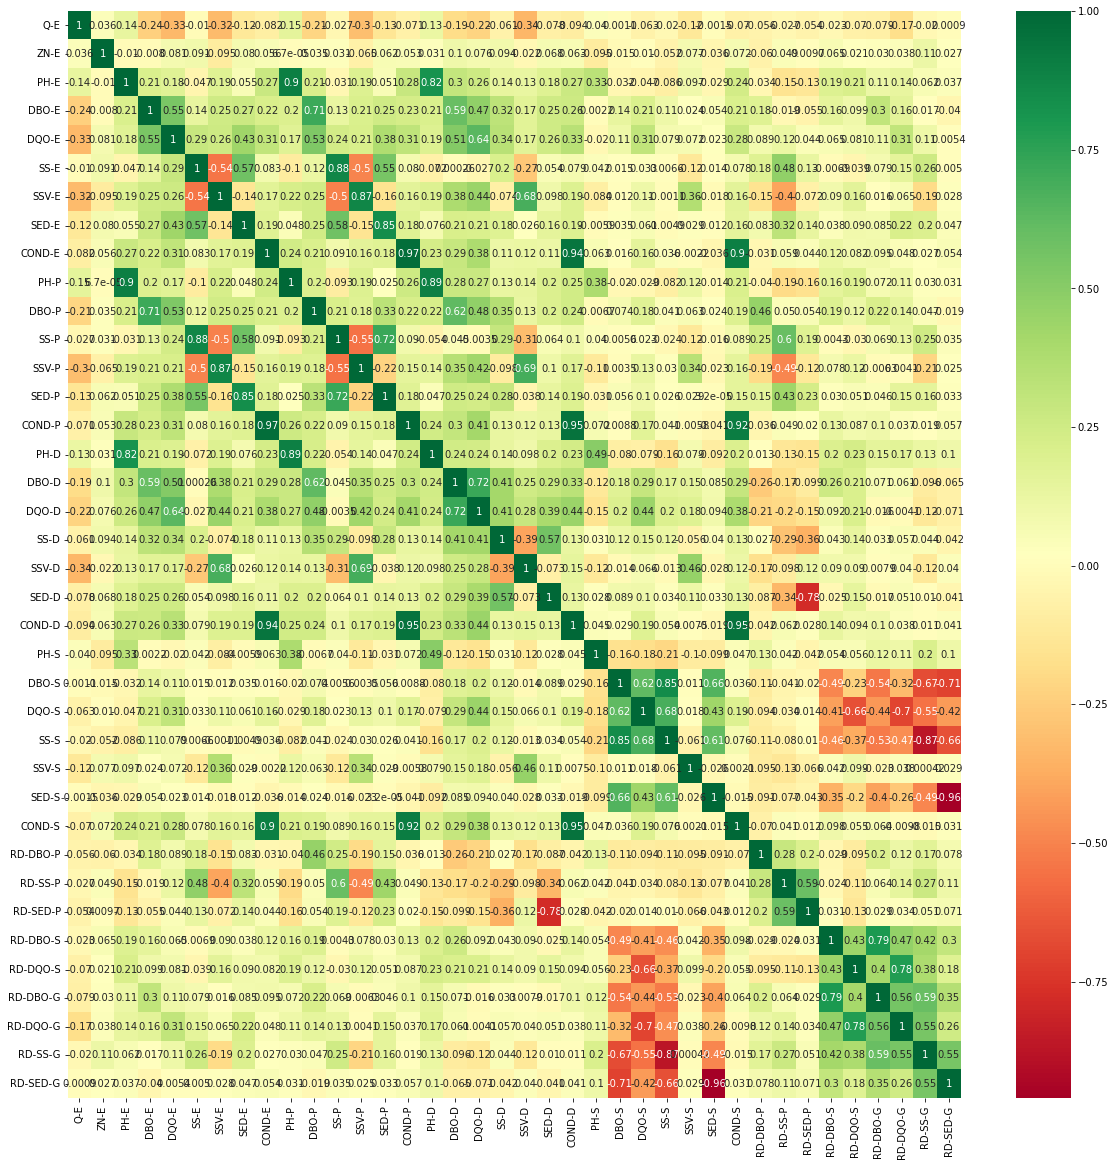

In [ ]:
# Menampilkan Heatmap

corr = dataframe.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# IV. Algoritma

In [ ]:
# Digunakan data [‘DBO-E’, ‘DBO-P’] untuk memvisualisasi cluster menjadi 2D

data = dataframe.loc[:, ['DBO-E', 'DBO-P']]
data.head(2)

,DBO-E,DBO-P
0,0.0,0.0
1,0.0,0.0


In [ ]:
# Konversi menjadi numpy array

X = data.values

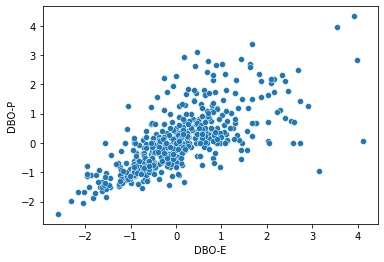

In [ ]:
# Visualisasi poin data

sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('DBO-E')
plt.ylabel('DBO-P')
plt.show()

In [ ]:
# Kalkulasi WCSS

def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
# Implementasi K-Means

def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
    for i, row in enumerate(X):
      mn_dist = float('inf')
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
    if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
    else:
        centroids = new_centroids
  return centroids, cluster

In [ ]:
# Mencari nilai K dengan metode Elbow

cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square) = jumlah kuadrat jarak antara setiap titik dan pusat massa dalam sebuah cluster
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

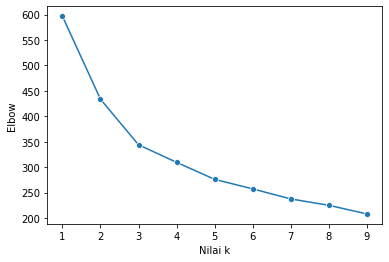

In [ ]:
# Membuat line plot antara Elbow dan nilai K

sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('Nilai k')
plt.ylabel('Elbow')
plt.show()

In [ ]:
# Membuat clusters

k = 4
centroids, cluster = kmeans(X, k)

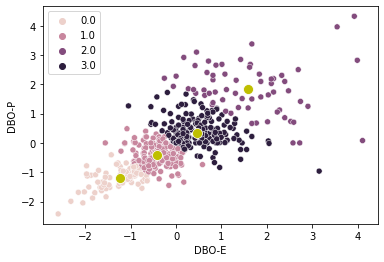

In [ ]:
# Visualisasi cluster yang terbentuk

sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('DBO-E')
plt.ylabel('DBO-P')
plt.show()

In [ ]:
# Membuat clusters

k = 3
centroids, cluster = kmeans(X, k)

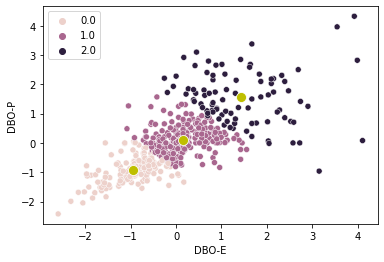

In [ ]:
# Visualisasi cluster yang terbentuk

sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('DBO-E')
plt.ylabel('DBO-P')
plt.show()